# ARMA

In [93]:
from numpy import array, kron, eye, zeros, log, sqrt, inf, mean, std, allclose
from numpy.linalg import inv 
from scipy.stats.distributions import norm
from scipy.optimize import fmin
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#datasets
a = """17.0 16.6 16.3 16.1 17.1 16.9 16.8 17.4 17.1 17.0 16.7 17.4 17.2 17.4 
 17.4 17.0 17.3 17.2 17.4 16.8 17.1 17.4 17.4 17.5 17.4 17.6 17.4 17.3
 17.0 17.8 17.5 18.1 17.5 17.4 17.4 17.1 17.6 17.7 17.4 17.8 17.6 17.5 
 16.5 17.8 17.3 17.3 17.1 17.4 16.9 17.3 17.6 16.9 16.7 16.8 16.8 17.2 
 16.8 17.6 17.2 16.6 17.1 16.9 16.6 18.0 17.2 17.3 17.0 16.9 17.3 16.8 
 17.3 17.4 17.7 16.8 16.9 17.0 16.9 17.0 16.6 16.7 16.8 16.7 16.4 16.5 
 16.4 16.6 16.5 16.7 16.4 16.4 16.2 16.4 16.3 16.4 17.0 16.9 17.1 17.1
 16.7 16.9 16.5 17.2 16.4 17.0 17.0 16.7 16.2 16.6 16.9 16.5 16.6 16.6 
 17.0 17.1 17.1 16.7 16.8 16.3 16.6 16.8 16.9 17.1 16.8 17.0 17.2 17.3
 17.2 17.3 17.2 17.2 17.5 16.9 16.9 16.9 17.0 16.5 16.7 16.8 16.7 16.7
 16.6 16.5 17.0 16.7 16.7 16.9 17.4 17.1 17.0 16.8 17.2 17.2 17.4 17.2
 16.9 16.8 17.0 17.4 17.2 17.2 17.1 17.1 17.1 17.4 17.2 16.9 16.9 17.0
 16.7 16.9 17.3 17.8 17.8 17.6 17.5 17.0 16.9 17.1 17.2 17.4 17.5 17.9
 17.0 17.0 17.0 17.2 17.3 17.4 17.4 17.0 18.0 18.2 17.6 17.8 17.7 17.2
 17.4"""
b = """-3 -5 7 3 -3 4 16 14 -3 2 6 1 -2 -1 -6 -1 -11 9 4 -4 -5 -3 -1 1 -2 2 -4 4 -3 0
2 1 -2 -1 -1 0 -2 1 0 0 -9 1 1 4 0 -4 6 8 7 2 -1 0 -4 6 1 2 5 -1 2 -3 -3 1 5 4
9 -2 3 -4 -1 6 4 4 -4 4 8 16 4 -4 -6 4 4 -4 4 -2 -4 -3 -1 -7 -15 10 13 2 -4 3 0
6 6 6 -2 0 3 11 0 -2 6 5 4 1 5 9 4 -4 -3 -11 2 -2 -4 2 9 0 4 0 -1 3 0 -3 0 -3
-4 -6 -6 2 11 -4 -5 -1 5 -3 0 -4 0 1 2 6 -3 -2 -5 -5 4 0 -2 4 5 2 -5 -7 5 -6
-11 -11 7 1 6 1 3 -6 -2 -6 0 0 -6 3 -6 -3 -9 -7 17 13 3 -7 0 1 1 4 0 -9 -1 -2 0
-6 0 -4 2 -2 1 1 6 5 -2 1 1 1 4 0 -1 -1 -1 3 1 -3 0 -6 2 0 -10 2 -1 -5 -8 -12
-3 11 0 0 2 -7 -5 7 -1 3 -1 0 0 -1 -5 -14 -14 -31 8 11 9 4 -11 -16 -8 2 -7 9 -3
5 -8 1 -15 -20 -17 1 -38 22 10 -8 -25 4 1 5 4 -15 -24 -12 -17 27 -3 6 -8 -12 4
12 -12 13 11 -5 11 1 -1 -5 5 9 16 4 -3 6 -12 -5 2 5 1 -10 8 -2 7 11 0 -11 9 0
-5 -7 9 -5 -1 3 7 1 -1 3 5 -1 16 2 -2 -1 -15 -2 -3 8 -9 -4 5 -6 2 -2 1 0 5 7 -3
-6 -3 -6 -13 5 -14 -5 3 -13 10 -1 9 2 0 6 -7 -3 -1 12 -10 4 -6 -7 -5 -13 10 -1
-8 14 7 -6 6 5"""
c = """ 101  82  66  35  31   7  20  92 154 125
  85  68  38  23  10  24  83 132 131 118
  90  67  60  47  41  21  16   6   4   7
  14  34  45  43  48  42  28  10   8   2
   0   1   5  12  14  35  46  41  30  24
  16   7   4   2   8  17  36  50  62  67
  71  48  28   8  13  57 122 138 103  86
  63  37  24  11  15  40  62  98 124  96
  66  64  54  39  21   7   4  23  55  94
  96  77  59  44  47  30  16   7  37  74"""
ta = np.fromstring(a, sep=' ',)
ta = ta.reshape((len(ta),1))
tb = np.fromstring(b, sep=' ')
tb = tb.reshape((len(tb),1))
tc = np.fromstring(c, sep=' ')
tc = tc.reshape((len(tc),1))

In [3]:
# fitted models
fit_a = (array([ 0.90867024]), array([-0.57585945]),
        17.065262486340927, 0.31253098628150655)
fit_b = (array([ 0.2350456, -0.3839864, -0.6566961]),
        array([-0.20234983,  0.41060419,  0.67314649]), -0.2853804404204241,
        7.0334525375368138)
fit_c = (array([ 1.22481184, -0.56007884]), array([ 0.38466735]),
        48.462278111207979, 14.622537558888457)

In [4]:
#helper functions
def kalman(F, Q, H, time_series):
    dim_time_series = time_series[0].shape[0]
    dim_states = F.shape[0]

    # covs[i] = P_{i | i-1}
    covs = zeros((len(time_series), dim_states, dim_states))
    mus = zeros((len(time_series), dim_states))

    covs[0] = inv(eye(dim_states**2) - kron(F,F)).dot(Q.flatten()).reshape(
            (dim_states,dim_states))
    mus[0] = zeros((dim_states,))

    for i in range(1, len(time_series)):
        t1 = inv(H.dot(covs[i-1]).dot(H.T))
        t2 = covs[i-1].dot(H.T.dot(t1.dot(H.dot(covs[i-1]))))
        covs[i] = F.dot((covs[i-1] - t2).dot(F.T)) + Q
        mus[i] = F.dot(mus[i-1]) + F.dot(covs[i-1].dot(H.T.dot(t1))).dot(
                time_series[i-1] - H.dot(mus[i-1]))
    return mus, covs

def state_space_rep(phis, thetas, mu, sigma):
    dim_states = max(len(phis), len(thetas)+1)
    dim_time_series = 1 #hardcoded for 1d time_series

    F = zeros((dim_states,dim_states))
    Q = zeros((dim_states, dim_states))
    H = zeros((dim_time_series, dim_states))

    F[0][:len(phis)] = phis
    F[1:,:-1] = eye(dim_states - 1)
    Q[0][0] = sigma**2
    H[0][0] = 1.
    H[0][1:len(thetas)+1] = thetas

    return F, Q, H, dim_states, dim_time_series

## Problem 1

Write a function that returns the log-likelihood of an $ARMA(p, q)$ model, given
a time series $z_t$. Use the `state_space_rep()` function provided to create $F$, $Q$, and $H$ and use
the `kalman()` filter provided to calculate the mean and covariance of the error terms.

In [33]:
def arma_likelihood(time_series, phis=array([]), thetas=array([]), mu=0.,
        sigma=1.):
    """
    Return the log-likelihood of the ARMA model parameters, given the time
    series.

    Parameters
    ----------
    time_series : ndarray of shape (n,1)
        The time series in question
    phis : ndarray of shape (p,)
        The phi parameters
    thetas : ndarray of shape (q,)
        The theta parameters
    mu : float
        The parameter mu
    sigma : float
        The parameter sigma

    Returns
    -------
    log_likelihood : float
        The log-likelihood of the model
    """
    F, Q, H, _, _ = state_space_rep(phis, thetas, mu, sigma)
    mus, covs = kalman(F, Q, H, time_series - mu)
    likelihood = 0
    for t, mu_t, cov_t in zip(time_series, mus, covs):
        _mu = H @ mu_t
        _cov = H @ cov_t @ H.T
        likelihood += norm.logpdf(t - mu, _mu, sqrt(_cov))
    return float(likelihood)

In [34]:
arma_likelihood(ta, phis=array([0.9]), mu=17., sigma=0.4)

-77.60354496552274

## Problem 2

Write a function that accepts a time series $\{z_t\}$ and returns the parameters of
the model that minimize the AICc, given the constraint that $p \leq 3, q \leq 3$.

In [46]:
def arma_fit(time_series):
    """
    Return the ARMA model that minimizes AICc for the given time series,
    subject to p,q <= 3. 

    Parameters
    ----------
    time_series : ndarray of shape (n,1)
        The time series in question

    Returns
    -------
    phis : ndarray of shape (p,)
        The phi parameters
    thetas : ndarray of shape (q,)
        The theta parameters
    mu : float
        The parameter mu
    sigma : float
        The parameter sigma
    """
    min_aicc = inf
    best = [], [], 0, 0
    n = len(time_series)
    for p in range(4):
        for q in range(4):
            print("p={}, q={}".format(p, q))
            def f(x):
                return -1*arma_likelihood(time_series, 
                                          phis=x[:p], 
                                          thetas=x[p:p+q], 
                                          mu=x[-2],
                                          sigma=x[-1])
            k = p + q + 2
            x0 = np.zeros(k)
            x0[-2] = time_series.mean()
            x0[-1] = time_series.std()
            sol = fmin(f,x0,maxiter=10000, maxfun=10000)
            aicc = 2*k*(1 + (k+1) / (n-k)) + 2*f(sol)
            print("aicc={}".format(aicc))
            if aicc < min_aicc:
                min_aicc = aicc
                best = sol[:p], sol[p:p+q], sol[-2], sol[-1]
    return best

In [47]:
ta_params = arma_fit(ta)

p=0, q=0
Optimization terminated successfully.
         Current function value: 98.149109
         Iterations: 22
         Function evaluations: 45
aicc=200.35975668340382
p=0, q=1
Optimization terminated successfully.
         Current function value: 75.074473
         Iterations: 84
         Function evaluations: 150
aicc=156.27265786667448
p=0, q=2
Optimization terminated successfully.
         Current function value: 63.797437
         Iterations: 149
         Function evaluations: 255
aicc=135.80212738970198
p=0, q=3
Optimization terminated successfully.
         Current function value: 58.776606
         Iterations: 343
         Function evaluations: 547
aicc=127.86571290620316
p=1, q=0
Optimization terminated successfully.
         Current function value: 59.438386
         Iterations: 89
         Function evaluations: 162
aicc=125.0004841001998
p=1, q=1


/Users/seong-euncho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


Optimization terminated successfully.
         Current function value: 50.745092
         Iterations: 202
         Function evaluations: 340
aicc=109.69743758235062
p=1, q=2
Optimization terminated successfully.
         Current function value: 50.045019
         Iterations: 561
         Function evaluations: 898
aicc=110.40253705028583
p=1, q=3
Optimization terminated successfully.
         Current function value: 49.181500
         Iterations: 933
         Function evaluations: 1444
aicc=110.80279027106096
p=2, q=0
Optimization terminated successfully.
         Current function value: 52.929661
         Iterations: 154
         Function evaluations: 263
aicc=114.06657569181267
p=2, q=1
Optimization terminated successfully.
         Current function value: 49.784073
         Iterations: 452
         Function evaluations: 726
aicc=109.8806460336639
p=2, q=2
Optimization terminated successfully.
         Current function value: 50.608759
         Iterations: 556
         Function evalua

(array([0.90867024]),
 array([-0.57585945]),
 17.065262486340927,
 0.31253098628150655)

## Problem 3

Use your solution from Problem 2 to fit models to the data found in `ta`, `tb`, and
`tc`. Report the fitted parameters $p$, $q$, $\Theta$.

In [50]:
tb_params = arma_fit(tb)
tc_params = arma_fit(tc)

p=0, q=0
Optimization terminated successfully.
         Current function value: 1251.093918
         Iterations: 21
         Function evaluations: 43
aicc=2506.2206223246562
p=0, q=1
Optimization terminated successfully.
         Current function value: 1249.741487
         Iterations: 75
         Function evaluations: 136
aicc=2505.5487270184276
p=0, q=2
Optimization terminated successfully.
         Current function value: 1249.730484
         Iterations: 140
         Function evaluations: 244
aicc=2507.5708577181936
p=0, q=3
Optimization terminated successfully.
         Current function value: 1249.356474
         Iterations: 220
         Function evaluations: 354
aicc=2508.8782364409803
p=1, q=0
Optimization terminated successfully.
         Current function value: 1249.742690
         Iterations: 76
         Function evaluations: 136
aicc=2505.5511341047754
p=1, q=1
Optimization terminated successfully.
         Current function value: 1249.736652
         Iterations: 101
       

/Users/seong-euncho/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


Optimization terminated successfully.
         Current function value: 1248.431140
         Iterations: 502
         Function evaluations: 795
aicc=2507.0275690293797
p=1, q=3
Optimization terminated successfully.
         Current function value: 1249.279125
         Iterations: 526
         Function evaluations: 827
aicc=2510.790294075792
p=2, q=0
Optimization terminated successfully.
         Current function value: 1249.729144
         Iterations: 140
         Function evaluations: 230
aicc=2507.568178682582
p=2, q=1
Optimization terminated successfully.
         Current function value: 1249.572321
         Iterations: 449
         Function evaluations: 732
aicc=2509.309931013438
p=2, q=2
Optimization terminated successfully.
         Current function value: 1249.585056
         Iterations: 364
         Function evaluations: 566
aicc=2511.4021568562357
p=2, q=3
Optimization terminated successfully.
         Current function value: 1245.935306
         Iterations: 776
         Functi

In [53]:
print("fitted params:\nta - {}\ntb - {}\ntc - {}".format(ta_params, tb_params, tc_params))

fitted params:
ta - (array([0.90867024]), array([-0.57585945]), 17.065262486340927, 0.31253098628150655)
tb - (array([ 0.2350456, -0.3839864, -0.6566961]), array([-0.20234983,  0.41060419,  0.67314649]), -0.2853804404204241, 7.033452537536814)
tc - (array([ 1.22481184, -0.56007884]), array([0.38466735]), 48.46227811120798, 14.622537558888457)


## Problem 4

The datasets `ta`, `tb` and `tc` contain mock weather data, giving the temperature
of the past 197 days. For each data set, find the mean and standard deviation of the next 20
intervals using the Kalman filter. Begin the recursion of the Kalman filter using the update
rule and then predict forward using the predict rule. Return the future means and standard
deviations (given by $H \hat{x}_{t+k|t} + \mu$ and $\sqrt{HP_{t+k|t}H^T}$ , respectively). For each dataset, plot the
original data, their expected values, and plus and minus two standard deviations to demonstrate
credible intervals.

In [99]:
def arma_forecast(time_series, phis=array([]), thetas=array([]), mu=0.,
        sigma=1., future_periods=20, generate_observations=False):
    """
    Return forecasts for a time series modeled with the given ARMA model.
    
    Parameters
    ----------
    time_series : ndarray of shape (n,1)
        The time series in question
    phis : ndarray of shape (p,)
        The phi parameters
    thetas : ndarray of shape (q,)
        The theta parameters
    mu : float
        The parameter mu
    sigma : float
        The parameter sigma
    future_periods : int
        The number of future periods to return
    generate_observations : bool
        Generate artificial observations (for problem 5)

    Returns
    -------
    evls : ndarray of shape (future_periods,)
        The expected values of z for times n + 1, ..., n + future_periods
    sigs : ndarray of shape (future_periods,)
        The deviations of z for times n + 1, ..., n + future_periods
    observations : ndarray of shape(future_periods)
        Generated observations. Returned if generate_observations=True
    """
    F, Q, H, _, _ = state_space_rep(phis, thetas, mu, sigma)
    mus, covs = kalman(F, Q, H, time_series - mu)
    x = mus[-1]
    P = covs[-1]
    y = time_series[-1] - mu - H @ x
    S = H @ P @ H.T
    K = P @ H.T @ inv(S)
    x = x + K @ y
    P = (np.eye(len(H)) - K@H) @ P
    means = []
    stds = []
    obs = []
    for _ in range(future_periods):
        x = F @ x
        P = F @ P @ F.T + Q
        mean = H @ x + mu
        std = sqrt(H @ P @ H.T)
        means.append(mean)
        stds.append(std)
        if generate_observations:
            zt = norm.rvs(mean, std)
            obs.append(zt)
    if generate_observations:
        return np.stack(means), np.stack(stds), np.stack(obs)
    else:
        return np.stack(means), np.stack(stds)

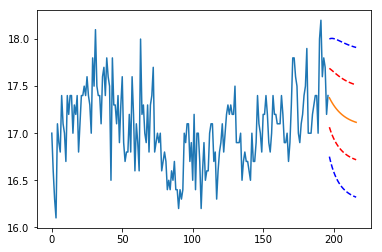

In [90]:
phis, thetas, mu, sigma = ta_params
means, stds = arma_forecast(ta, phis, thetas, mu, sigma, 20)
stds = stds.reshape(-1, 1)
o1 = np.linspace(0, len(ta), len(ta), endpoint=False)
o2 = np.linspace(len(ta), len(ta)+20, 20, endpoint=False)
plt.plot(o1, ta)
plt.plot(o2, means)
plt.plot(o2, means + stds, '--', c='r')
plt.plot(o2, means - stds, '--', c='r')
plt.plot(o2, means + 2*stds, '--', c='b')
plt.plot(o2, means - 2*stds, '--', c='b')
plt.show()

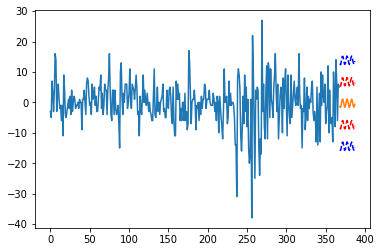

In [91]:
phis, thetas, mu, sigma = tb_params
means, stds = arma_forecast(tb, phis, thetas, mu, sigma, 20)
stds = stds.reshape(-1, 1)
o1 = np.linspace(0, len(tb), len(tb), endpoint=False)
o2 = np.linspace(len(tb), len(tb)+20, 20, endpoint=False)
plt.plot(o1, tb)
plt.plot(o2, means)
plt.plot(o2, means + stds, '--', c='r')
plt.plot(o2, means - stds, '--', c='r')
plt.plot(o2, means + 2*stds, '--', c='b')
plt.plot(o2, means - 2*stds, '--', c='b')
plt.show()

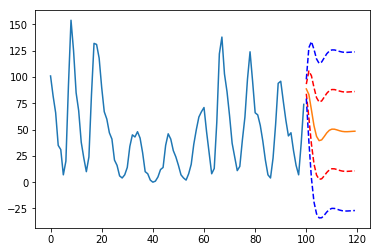

In [92]:
phis, thetas, mu, sigma = tc_params
means, stds = arma_forecast(tc, phis, thetas, mu, sigma, 20)
stds = stds.reshape(-1, 1)
o1 = np.linspace(0, len(tc), len(tc), endpoint=False)
o2 = np.linspace(len(tc), len(tc)+20, 20, endpoint=False)
plt.plot(o1, tc)
plt.plot(o2, means)
plt.plot(o2, means + stds, '--', c='r')
plt.plot(o2, means - stds, '--', c='r')
plt.plot(o2, means + 2*stds, '--', c='b')
plt.plot(o2, means - 2*stds, '--', c='b')
plt.show()

# Problem 5

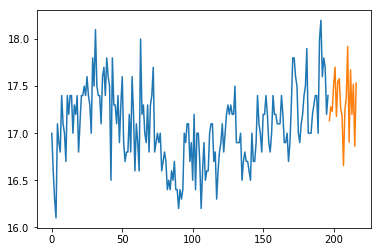

In [108]:
phis, thetas, mu, sigma = ta_params
_, _, obs = arma_forecast(ta, phis, thetas, mu, sigma, 20, generate_observations=True)
o1 = np.linspace(0, len(ta), len(ta), endpoint=False)
o2 = np.linspace(len(ta), len(ta)+20, 20, endpoint=False)
plt.plot(o1, ta)
plt.plot(o2, obs)
plt.show()

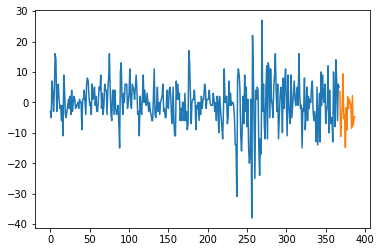

In [111]:
phis, thetas, mu, sigma = tb_params
_, _, obs = arma_forecast(tb, phis, thetas, mu, sigma, 20, generate_observations=True)
o1 = np.linspace(0, len(tb), len(tb), endpoint=False)
o2 = np.linspace(len(tb), len(tb)+20, 20, endpoint=False)
plt.plot(o1, tb)
plt.plot(o2, obs)
plt.show()

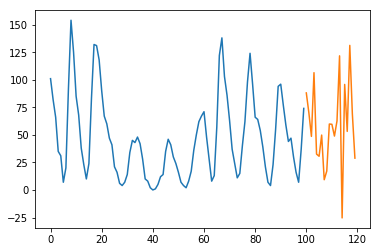

In [115]:
phis, thetas, mu, sigma = tc_params
_, _, obs = arma_forecast(tc, phis, thetas, mu, sigma, 20, generate_observations=True)
o1 = np.linspace(0, len(tc), len(tc), endpoint=False)
o2 = np.linspace(len(tc), len(tc)+20, 20, endpoint=False)
plt.plot(o1, tc)
plt.plot(o2, obs)
plt.show()